# Problem Solving & Statistics Final Project Assignment

## Sejong University, 3-2, Computer Science

### Professor : Shake Md Riazul Islam

<br>

## Title

### Student Title

Computer Engineering / Janghoo Lee, 18011573 / Project Assignment

<br>

### Project Title

Demonstrate the Central Limit Theorem (CLT) in Python.

<br>

### Objective

- Objective: Reflecting the knowledge of sampling distribution using Python programming.
- Report Submission Deadline: June 19, 2020 (11.30 PM, Friday).

<br>

## Topics

A gray-scale image is a two-dimensional array of numbers, each of which represents the
corresponding pixel intensity. You can obtain this array of numbers (i.e. image read) using various
python packages.
Consider the supplied "lena_gray.gif" gray-scale image as the population. Based on the
population, you need to implement the following tasks:

- Task1
- Task2
- Task3
- Task4

### Ready to solve the problem

- import libraries
- load images
- tiny EDA

<br>

In [2]:
# import libs
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

<class 'numpy.ndarray'>
(512, 512, 4)
(512, 512)


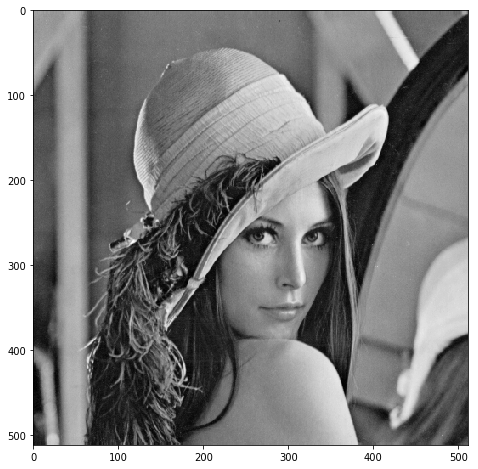

In [3]:
# load image
im_nparray = plt.imread("lena_gray.gif")

# Checking
print(type(im_nparray))
print(im_nparray.shape)

# remove 1,2,3 channel because it has no meanings
im_nparray = im_nparray[:,:,0]
print(im_nparray.shape)
plt.figure(figsize = [8,8])
plt.imshow(im_nparray, 'gray')

In [4]:
flattened_im_nparray = im_nparray.reshape(-1)
print(flattened_im_nparray.shape)

(262144,)


## Task1

 Request : Find out the population size 𝑛, population mean (𝜇), population variance (𝜎^2), population
range, minimum number, maximum number, population mode, and population median.


We already know that :

<br>

- The Lena image (consists of 512 by 512 by 1) will contain 512x512 intensity values.
- The maximum value for each intensity value is 2^8-1 and the minimum is 0.

<br>

In [5]:
print(flattened_im_nparray.shape)
population_size_n = flattened_im_nparray.shape[0]

(262144,)


In [6]:
population_mean_m = flattened_im_nparray.mean()
population_variance_v = flattened_im_nparray.var()
population_std_sigma = flattened_im_nparray.std()

print('population mean :', population_mean_m)
print('population variance :', population_variance_v)
print('population std :', population_std_sigma, '(likewise {})\n'.format(population_variance_v**(1/2)))

population_minval = flattened_im_nparray.min()
population_median = np.median(flattened_im_nparray)
population_maxval = flattened_im_nparray.max()
population_range = (population_minval, population_maxval) # use later
population_mode = np.bincount(flattened_im_nparray).argmax()

print('population min :', population_minval)
print('population median :', population_median)
print('population max :', population_maxval)
print('population range :', population_minval,'~', population_maxval)
print('population mode :', population_mode, '( count :', flattened_im_nparray[population_mode],')')

population mean : 124.05046081542969
population variance : 2289.9760151074734
population std : 47.853693850187504 (likewise 47.853693850187504)

population min : 25
population median : 129.0
population max : 245
population range : 25 ~ 245
population mode : 154 ( count : 129 )


## Task2

Request : Find out the histogram of the population. Comment on the population distribution.

<br>

(array([15363., 31302., 20304., 35230., 41809., 50786., 33252., 17583.,
        15887.,   628.]),
 array([ 25.,  47.,  69.,  91., 113., 135., 157., 179., 201., 223., 245.]),
 <a list of 10 Patch objects>)

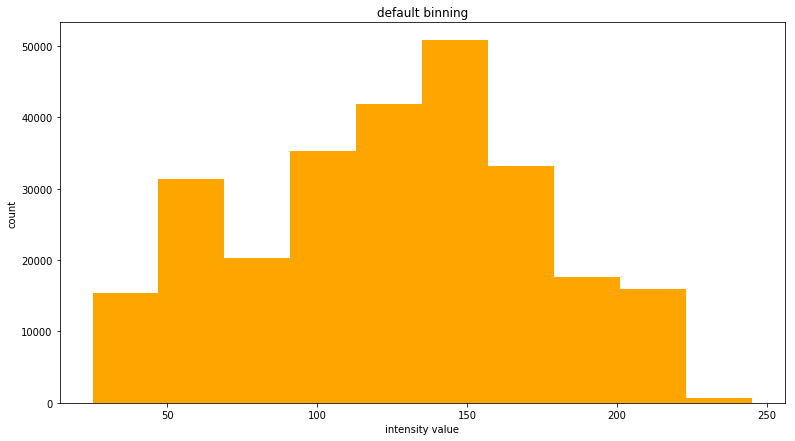

In [7]:
# lena entire image intensity values histogram

plt.figure(figsize = [13,7])

plt.title('default binning')
plt.xlabel('intensity value')
plt.ylabel('count')
plt.hist(np.sort(flattened_im_nparray), color = 'orange')

It's not a bell-shaped distribution

<br>

## Task3

Request : Investigate the histogram by changing the number of bins to 10, 100, and 1,000. Provide
your observations

<br>

end!


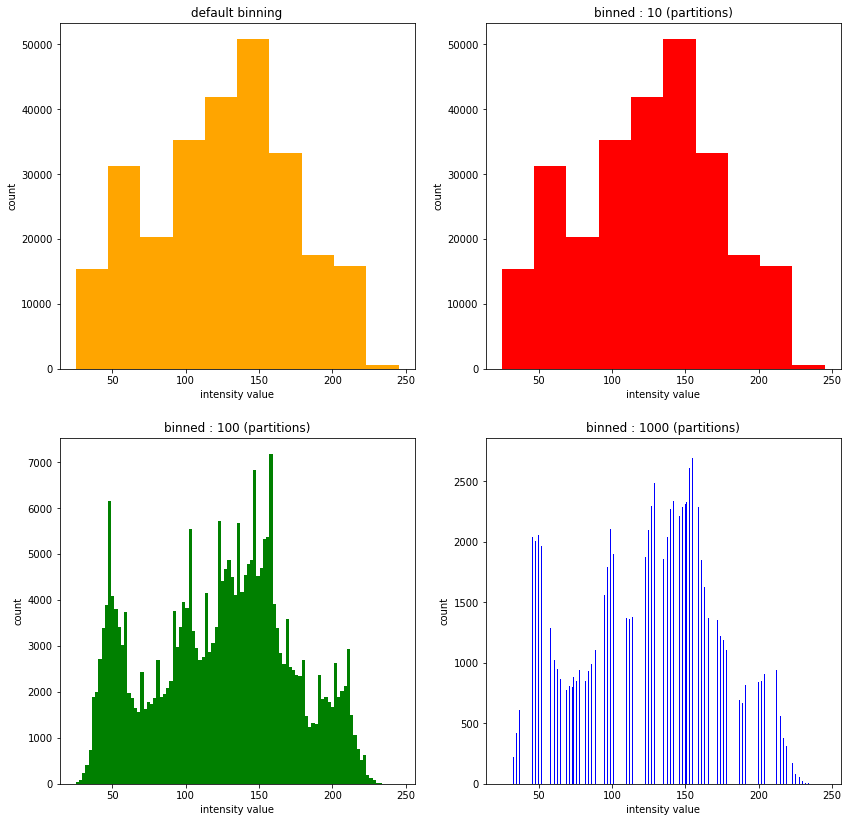

In [8]:
plt.figure(figsize = [14,14])

plt.subplot(2,2,1)
plt.title('default binning')
plt.xlabel('intensity value')
plt.ylabel('count')
plt.hist(np.sort(flattened_im_nparray), color = 'orange')

plt.subplot(2,2,2)
plt.title('binned : 10 (partitions)')
plt.xlabel('intensity value')
plt.ylabel('count')
plt.hist(np.sort(flattened_im_nparray), color = 'red', bins = 10)


plt.subplot(2,2,3)
plt.title('binned : 100 (partitions)')
plt.xlabel('intensity value')
plt.ylabel('count')
plt.hist(np.sort(flattened_im_nparray), color = 'green', bins = 100)


plt.subplot(2,2,4)
plt.title('binned : 1000 (partitions)')
plt.xlabel('intensity value')
plt.ylabel('count')
plt.hist(np.sort(flattened_im_nparray), color = 'blue', bins = 1000)

print('end!')

Let's see these graph avobe.
As you look into more and more fine sections, you can see that some shape of probability distribution changes. It certainly shows that population-distribution is not a normal distribution.

<br>

## Task4

 Demonstrate the central limit theorem (i.e., the distribution of the sampling mean will
approach towards the normal distribution with the mean 𝜇 and variance 𝜎
2/𝑛 as the sample size
increases). Recommended sample sizes are 5, 10, 20, 30, 50, 100. In addition to any content that
you think appropriate for this demonstration, you will include various graphical representations
such as the respective histogram for each sample size.

### What is Central Limit Theorem?

In probability theory the central limit theorem (CLT) establishes that in some situations : 
- when independent random variables (X1, X2, X3, ... Xk) are sampled from population sample space and sample size n is sufficiently large,
- their (X1, X2, X3, ... Xk) expected value's random variable X bar distribution tends toward a normal distribution (informally a bell curve) 
- even if the population random variables themselves are not normally distributed.

<br>

### Why Central Limit Theorem is Important?

CLT is significant because :
- The results hold regardless of what shape the original population distribution was which makes it important for statistical inference. 
- The more data that's gathered, the more accurate the statistical inferences become, meaning more certainty in estimates.

<br>

In [9]:
unlimit = 10

In [10]:
# np.random.choice selects random number from list
# define function
def Xbar(sampling_iterations_with_sample_size_from_population, sample_size) :
    X_bar = []
    for i in range(sampling_iterations_with_sample_size_from_population):
        X1 = np.random.choice(flattened_im_nparray, sample_size)
        X1_mean = X1.mean()
        X_bar.append(X1_mean)
    return X_bar

In [11]:
bucket = {}

# sampling : 1 time 
# sample size : 5
bucket[1] = Xbar(1, 5)

# sampling : 5 times
# sample size : 5
bucket[5] = Xbar(5, 5)

# sampling : 50 times 
# sample size : 5
bucket[20] = Xbar(50, 5)

# sampling : 250 times
# sample size : 5
bucket[250] = Xbar(250, 5)

# sampling : 1000 times
# sample size : 5
bucket[1000] = Xbar(1000, 5)

# sampling : 5000 times
# sample size : 5
bucket[5000] = Xbar(5000, 5)

# sampling : 25000 times
# sample size : 5
bucket[25000] = Xbar(25000, 5)

# sampling : 100000 times 
# sample size : 5
bucket[100000] = Xbar(100000, 5)

for i in bucket: 
    print(len(bucket[i]))

1
5
50
250
1000
5000
25000
100000


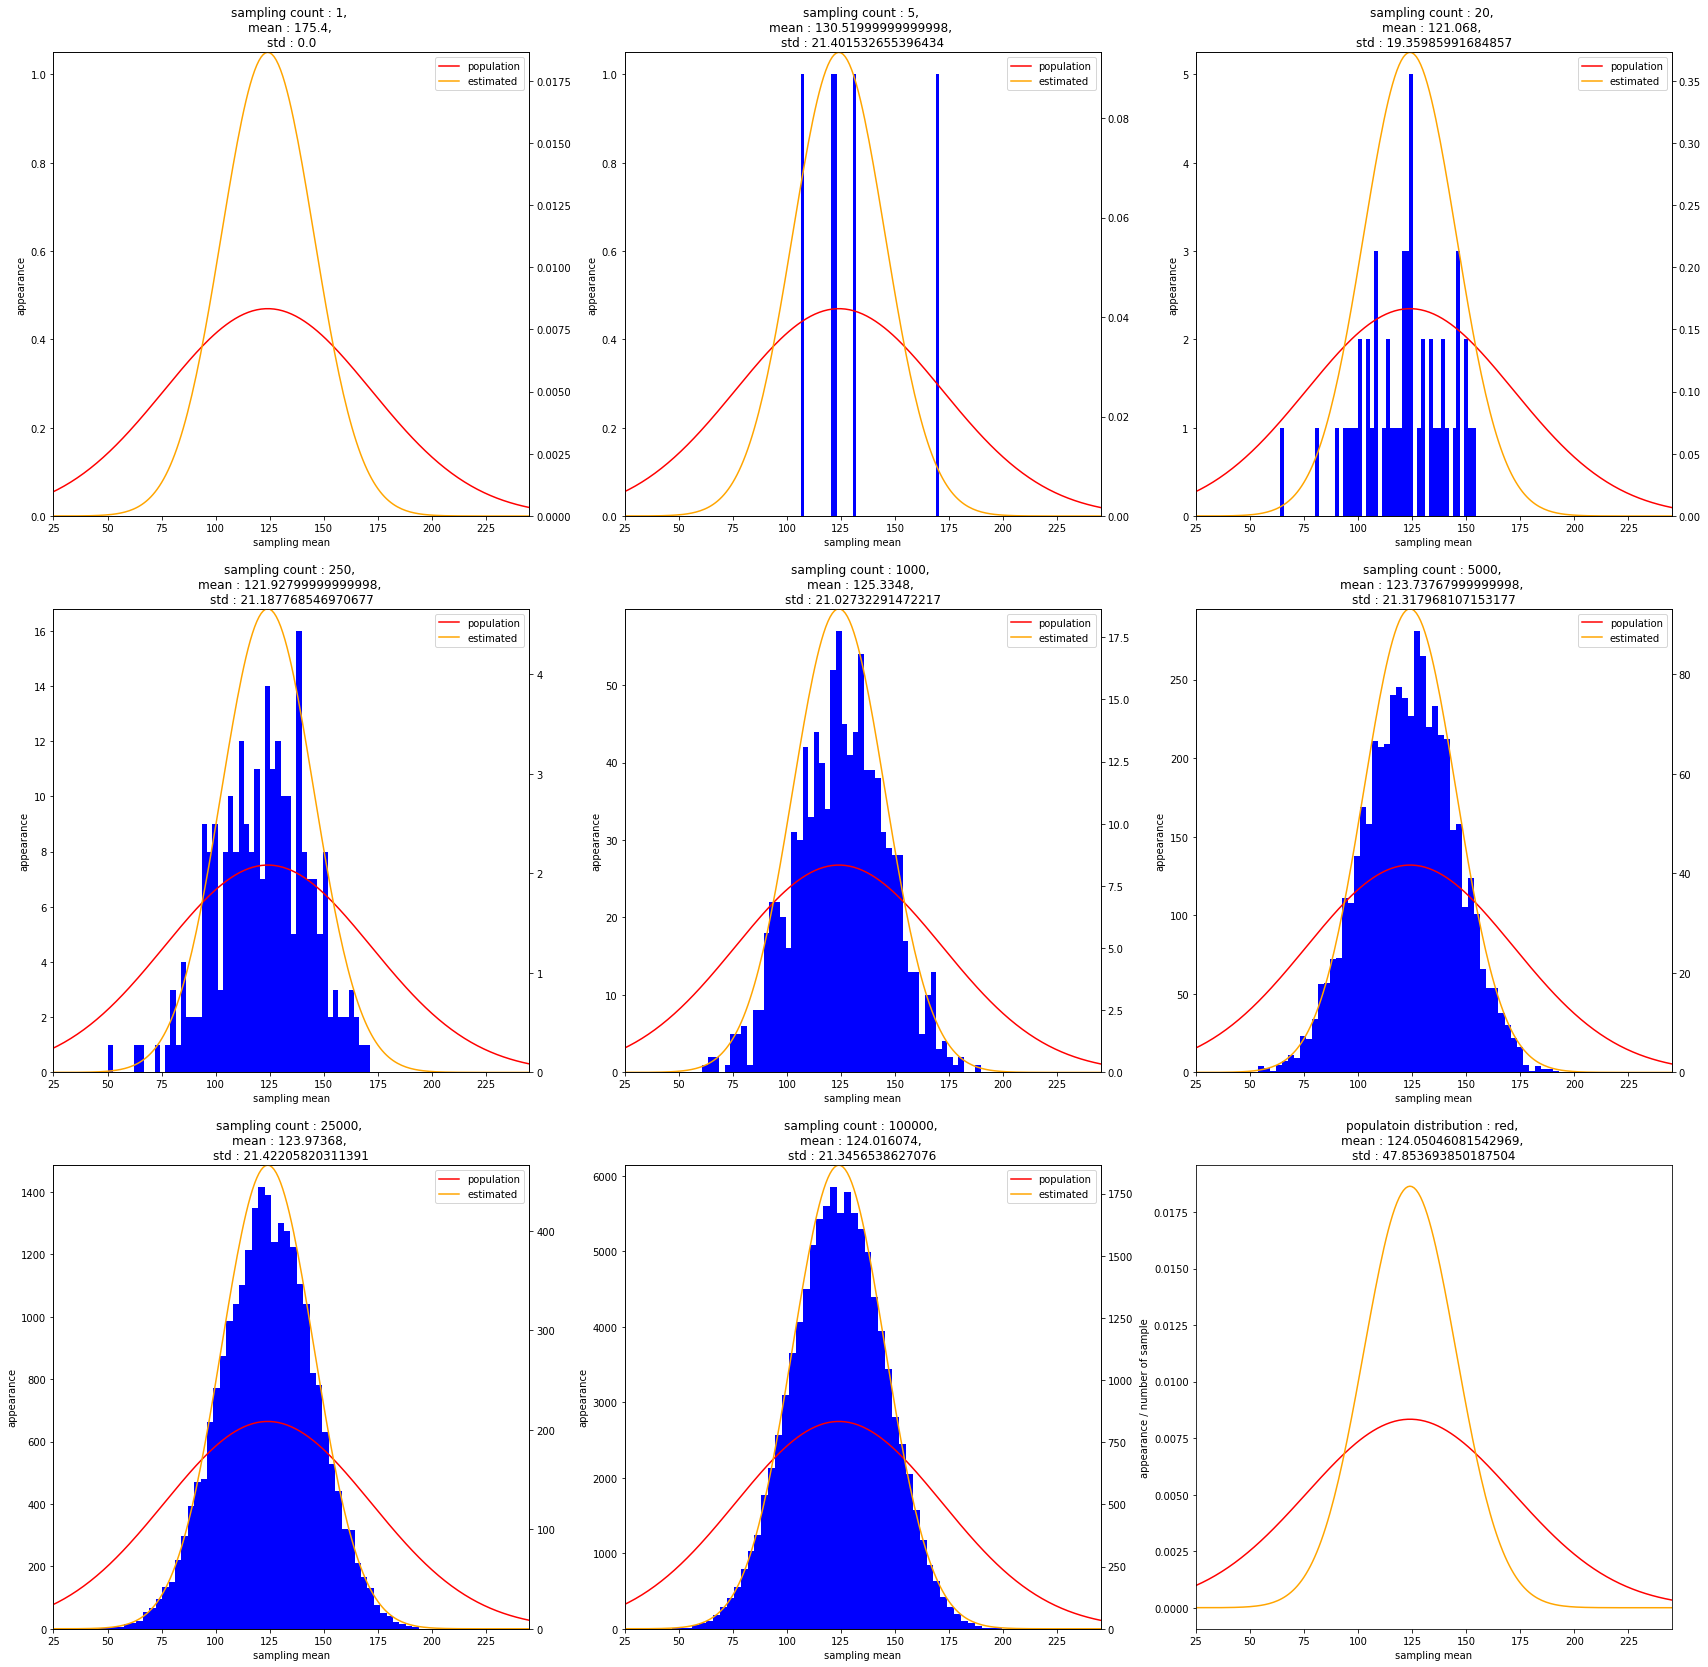

In [12]:
plt.figure(figsize = [29,29])
domain = np.linspace(0,255,256)

cnt = 1
for i in bucket :
    ax1 = plt.subplot((len(bucket)//3)+1, 3,cnt)
    
    # skip degrees of freedom
    plt.title('sampling count : {}, \nmean : {}, \nstd : {}'.format(i, np.array(bucket[i]).mean(),np.array(bucket[i]).std()))
    plt.xlabel('sampling mean')
    plt.ylabel('appearance')
    plt.xlim(population_range)    
    plt.hist(np.sort(bucket[i]), color = 'blue', bins = 50)
    ax2 = ax1.twinx()

    ax2.plot(domain, np.asarray(norm.pdf(domain, population_mean_m, population_std_sigma))*i, 
                  color = 'red', label="population")
    ax2.plot(domain, np.asarray(norm.pdf(domain, population_mean_m, population_std_sigma / 5**(1/2)))*i, 
                  color = 'orange', label="estimated")
    ax2.legend()
    ax2.margins(0)
    cnt+=1
    

plt.subplot((len(bucket)//3)+1, 3,cnt)
plt.title('populatoin distribution : red, \nmean : {}, \nstd : {}'.format(population_mean_m, population_std_sigma))
plt.xlabel('sampling mean')
plt.ylabel('appearance / number of sample')
plt.xlim(population_range)
plt.plot(domain, norm.pdf(domain, population_mean_m, population_std_sigma), color = 'red', label="population")
plt.plot(domain, norm.pdf(domain, population_mean_m, population_std_sigma / 5**(1/2)), color = 'orange', label="estimated")

Now, WHAT CLT WANTS TO SHOW

In [13]:
bucket0 = {}

# sampling : 10000 time 
# sample size : 1
bucket0[1] = Xbar(10000, 1)

# sampling : 10000 times
# sample size : 5
bucket0[5] = Xbar(10000, 5)

# sampling : 10000 times 
# sample size : 10
bucket0[10] = Xbar(10000, 10)

# sampling : 10000 times
# sample size : 20
bucket0[20] = Xbar(10000, 20)

# sampling : 10000 times
# sample size : 50
bucket0[50] = Xbar(10000, 50)

# sampling : 10000 times
# sample size : 100
bucket0[100] = Xbar(10000, 100)


for i in bucket0: 
    print(len(bucket0[i]))

10000
10000
10000
10000
10000
10000


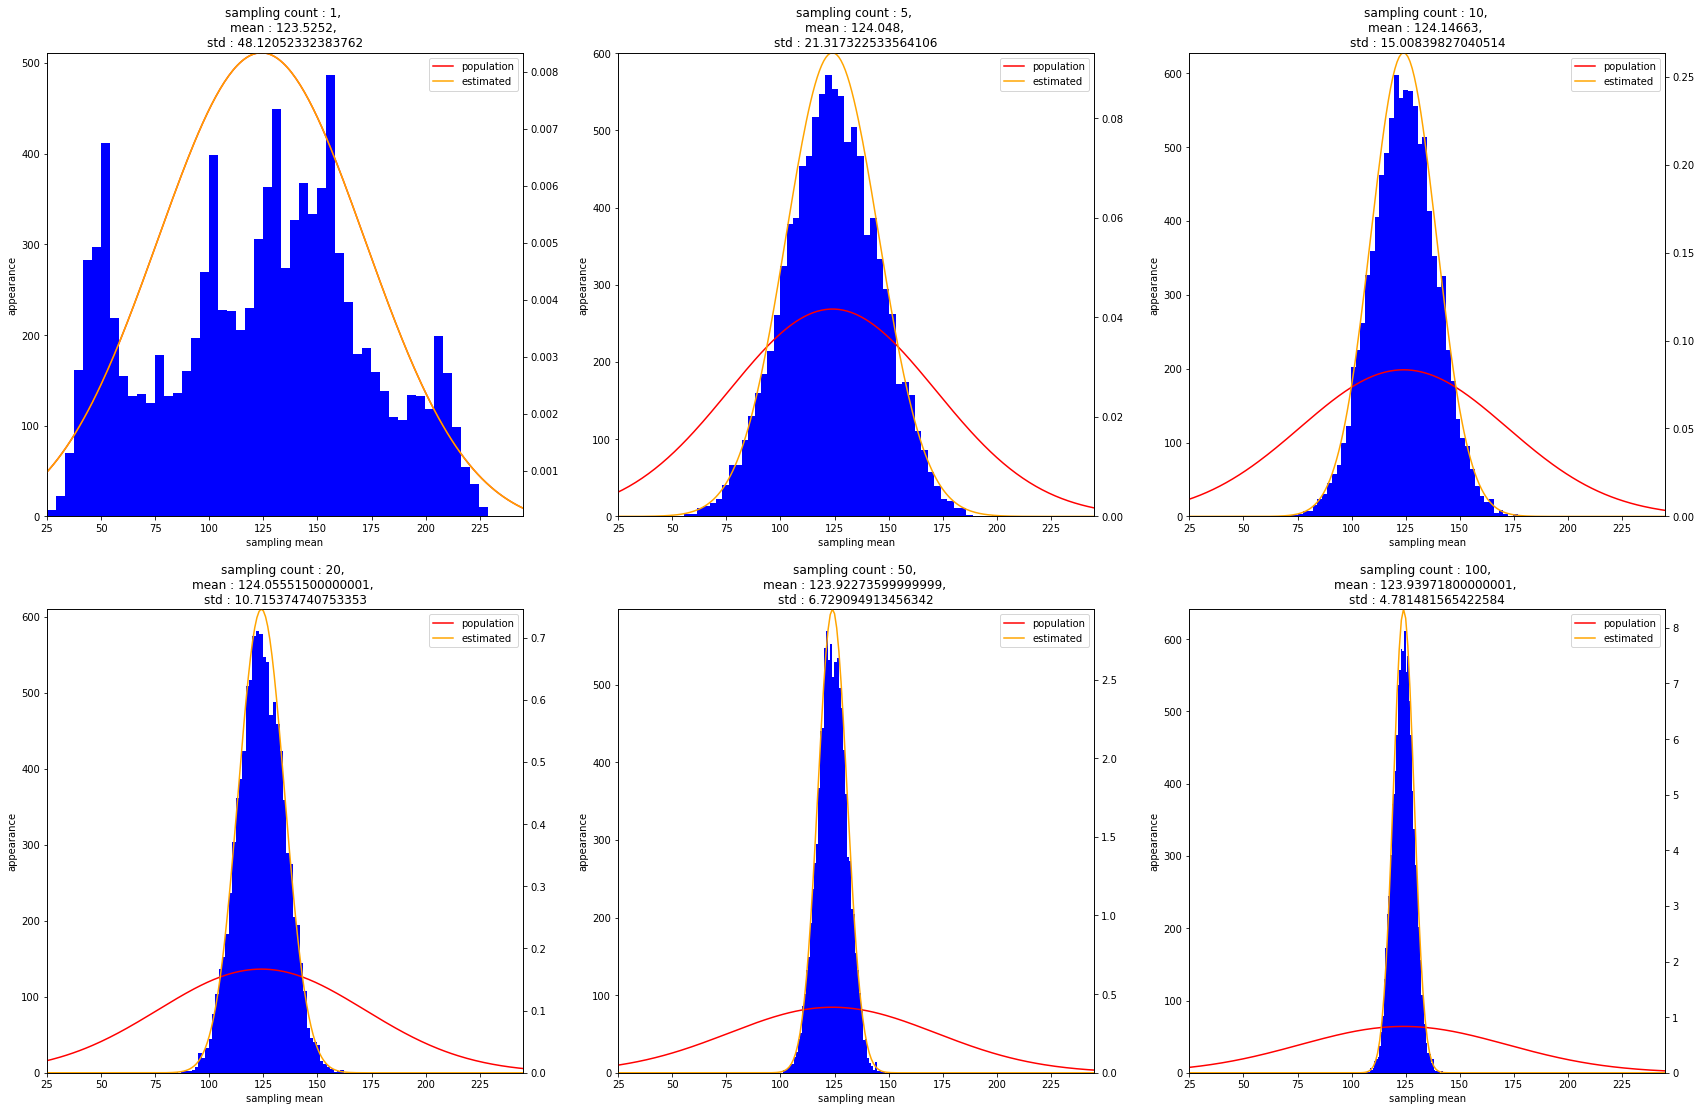

In [14]:
plt.figure(figsize = [29,29])
domain = np.linspace(0,255,256)

cnt = 1
for i in bucket0 :
    ax1 = plt.subplot((len(bucket0)//3)+1, 3,cnt)
    
    # skip degrees of freedom
    plt.title('sampling count : {}, \nmean : {}, \nstd : {}'.format(i, np.array(bucket0[i]).mean(),np.array(bucket0[i]).std()))
    plt.xlabel('sampling mean')
    plt.ylabel('appearance')
    plt.xlim(population_range)    
    plt.hist(np.sort(bucket0[i]), color = 'blue', bins = 50)
    ax2 = ax1.twinx()

    ax2.plot(domain, np.asarray(norm.pdf(domain, population_mean_m, population_std_sigma))*i, 
                  color = 'red', label="population")
    ax2.plot(domain, np.asarray(norm.pdf(domain, population_mean_m, population_std_sigma / i**(1/2)))*i, 
                  color = 'orange', label="estimated")
    ax2.legend()
    ax2.margins(0)
    cnt+=1

As the figure shown, when sample size n is sufficiently large <br>
(of course, when the number of sample X bar  X1 X2 X3 ... Xk is assumed as unlimited in order to show distinct distribution) 

- distribution of X bar is going to bell-shape
- mean value of X bar is going to population mean 
- standard deviation of X bar is going to population standard variation / root n

<br>

even if population distribution is not bell shaped.

<br>

CLT demonstrated empirically.

### Bonus Track

In [13]:
bucket2 = {}

# sampling : 5000 
# sample size : 5
bucket2[5] = Xbar(5000, 5)

# sampling : 5000 
# sample size : 10
bucket2[10] = Xbar(5000, 10)

# sampling : 5000 
# sample size : 20
bucket2[20] = Xbar(5000, 20)

# sampling : 5000 
# sample size : 30
bucket2[30] = Xbar(5000, 30)

# sampling : 5000 
# sample size : 50
bucket2[50] = Xbar(5000, 50)

# sampling : 5000 
# sample size : 100
bucket2[100] = Xbar(5000, 100)

for i in bucket2: 
    print(len(bucket2[i]))

5000
5000
5000
5000
5000
5000


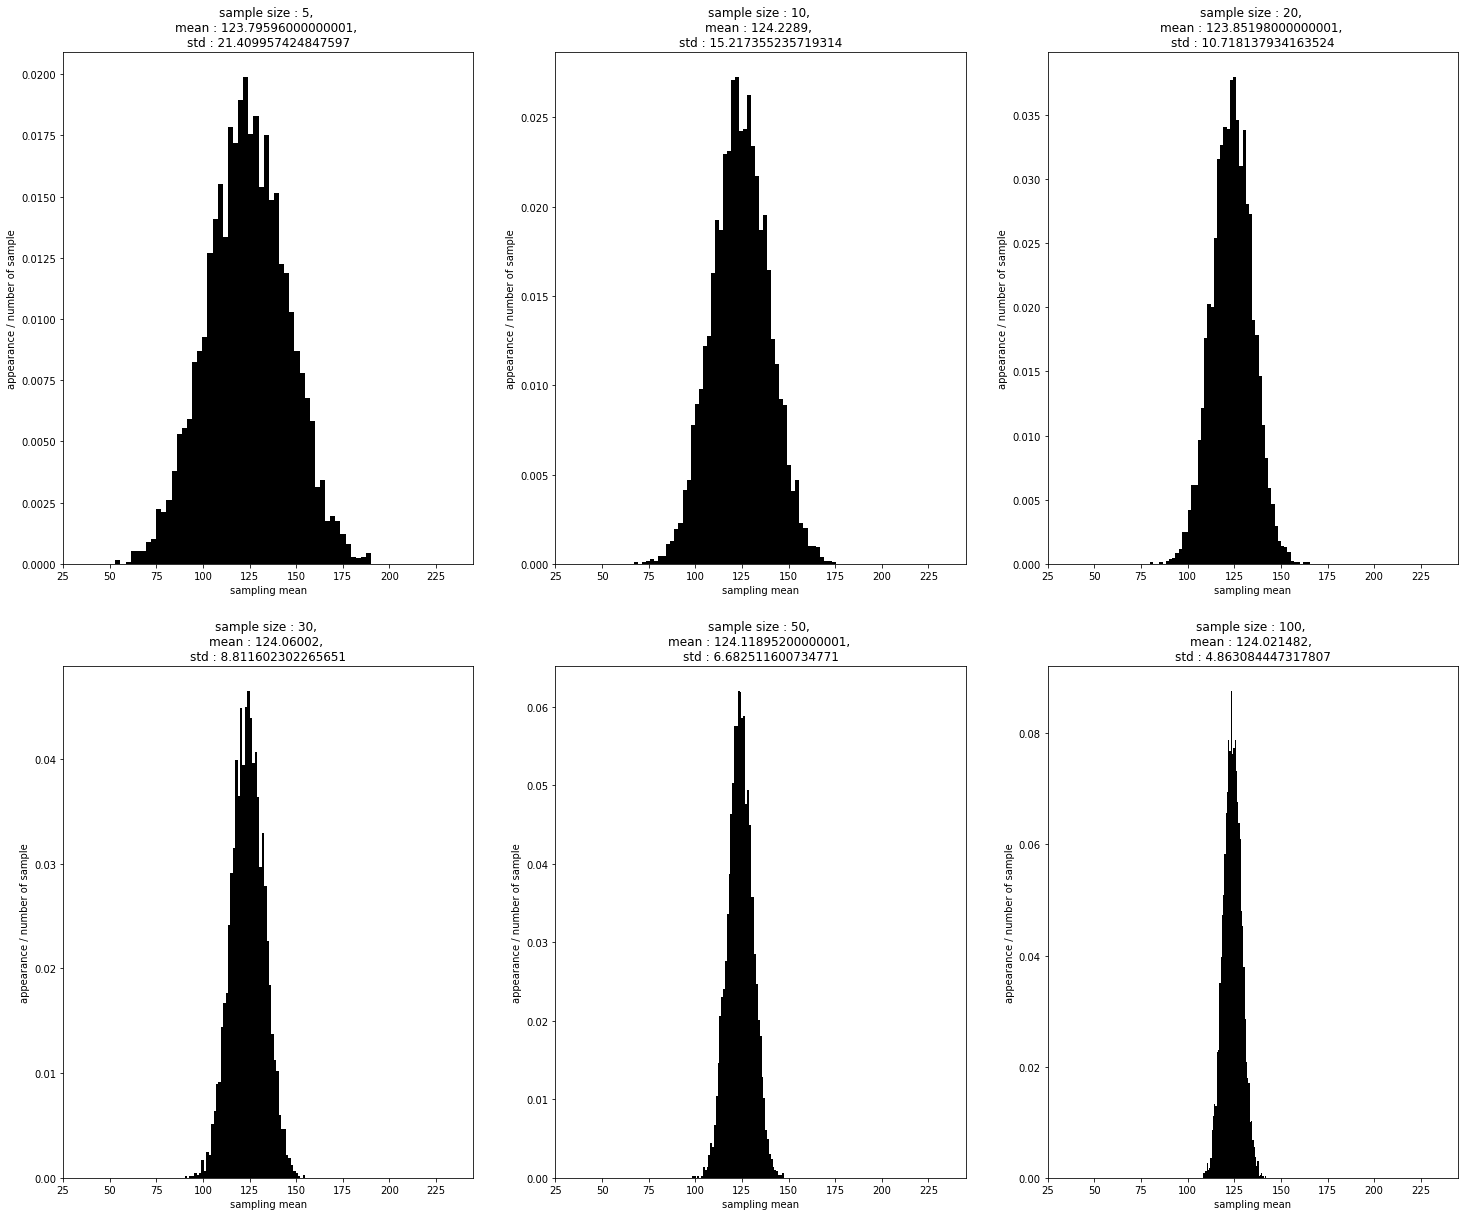

In [14]:
plt.figure(figsize = [25,32])

cnt = 1
for i in bucket2 :
    plt.subplot(len(bucket2)//2, 3, cnt)
    plt.title('sample size : {}, \nmean : {}, \nstd : {}'.format(i, np.array(bucket2[i]).mean(), np.array(bucket2[i]).std(ddof=1)))
    plt.xlabel('sampling mean')
    plt.ylabel('appearance / number of sample')
    plt.xlim(population_range)    
    plt.hist(np.sort(bucket2[i]), color = 'black', bins = 50, density=True)
    cnt+=1

In [15]:
bucket3 = {}

# sampling : 10 
# sample size : 1
bucket3[10] = Xbar(10, 1)

# sampling : 50 
# sample size : 1
bucket3[50] = Xbar(50, 1)

# sampling : 250 
# sample size : 1
bucket3[250] = Xbar(250, 1)

# sampling : 1000 
# sample size : 1
bucket3[1000] = Xbar(1000, 1)

# sampling : 5000 
# sample size : 1
bucket3[5000] = Xbar(5000, 1)

# sampling : 25000 
# sample size : 1
bucket3[25000] = Xbar(25000, 1)

for i in bucket3: 
    print(len(bucket3[i]))

10
50
250
1000
5000
25000


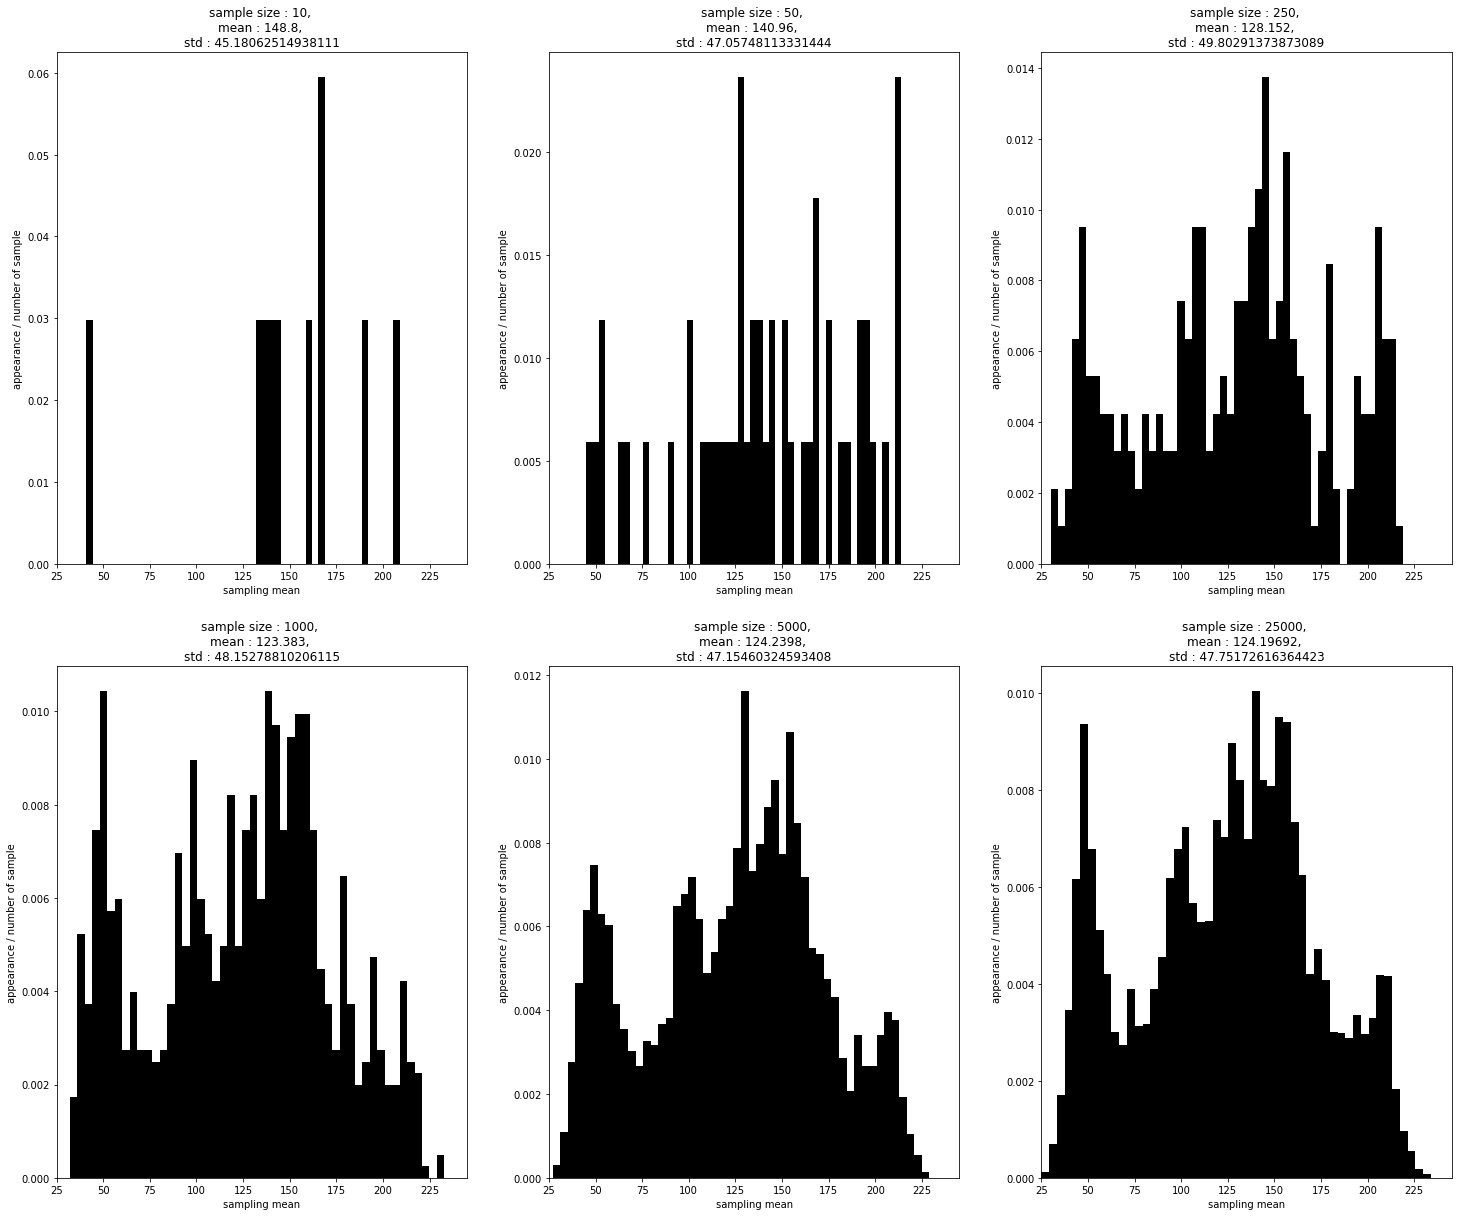

In [16]:
plt.figure(figsize = [25,32])

cnt = 1
for i in bucket3 :
    plt.subplot(len(bucket2)//2, 3, cnt)
    plt.title('sample size : {}, \nmean : {}, \nstd : {}'.format(i, np.array(bucket3[i]).mean(), np.array(bucket3[i]).std(ddof=1)))
    plt.xlabel('sampling mean')
    plt.ylabel('appearance / number of sample')
    plt.xlim(population_range)    
    plt.hist(np.sort(bucket3[i]), color = 'black', bins = 50, density=True)
    cnt+=1